In [1]:
from google.colab import files

uploaded_model1 = files.upload()





Saving model3a.csv to model3a.csv


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from sklearn.decomposition import NMF
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model

# Load the dataset
data = pd.read_csv('model3a.csv')

# Preprocess the data
# Convert labels to one-hot encoding
labels = data.iloc[:, 1:]
text_data = data['text']

# Train-test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Matrix Factorization (NMF)
num_topics = 255
nmf = NMF(n_components=num_topics)
W = nmf.fit_transform(labels)
H = nmf.components_

# Neural Collaborative Filtering (NCF)
num_users = labels.shape[0]
num_items = labels.shape[1]
embedding_dim = 64

# Define NCF model
user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

user_embedding = Embedding(num_users, embedding_dim)(user_input)
item_embedding = Embedding(num_items, embedding_dim)(item_input)

user_flat = Flatten()(user_embedding)
item_flat = Flatten()(item_embedding)

concat = Concatenate()([user_flat, item_flat])

dense_1 = Dense(64, activation='relu')(concat)
dense_2 = Dense(32, activation='relu')(dense_1)

output = Dense(1, activation='sigmoid')(dense_2)

ncf_model = Model(inputs=[user_input, item_input], outputs=output)
ncf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train NCF model
user_indices = train_data.index
item_indices = range(num_items)
labels_train = labels.values

# Define positive and negative samples for training
def generate_samples():
    for user in user_indices:
        for item in item_indices:
            yield user, item, labels_train[user, item]

samples = np.array(list(generate_samples())).T
users_train = samples[0]
items_train = samples[1]
labels_train = samples[2]

ncf_model.fit([users_train, items_train], labels_train, epochs=10, batch_size=8)

# Recommendation for a given text
def recommend_labels(text, threshold=0.5):
    # Predict labels using NCF model
    user_idx = np.array([0] * num_items)  # Assuming user index 0 for recommendation
    item_idx = np.array(range(num_items))
    scores = ncf_model.predict([user_idx, item_idx])

    # Apply thresholding to get binary predictions
    binary_predictions = (scores > threshold).astype(int)

    # Get the indices of recommended labels based on thresholding
    recommended_labels = np.where(binary_predictions == 1)[0]

    return recommended_labels

# Example: Recommend labels for a given text
text_user_input = "I made a goal to make come up with an official project in Crafts for Service.&#10;I felt inspired&#10;I talked to peers about possible ideas&#10;That doing these projects can be fairly easy&#10;I wouldn&apos;t do anything differently except plan things sooner"
recommended_labels = recommend_labels(text_user_input)

# Print recommended labels
print("Recommended Microcredentials for the input text:")
for label in recommended_labels:
    print(f"Label {label}: {labels.columns[label]}")


Epoch 1/10
52744/52744 [==============================] - 273s 5ms/step - loss: 0.1174 - accuracy: 0.9651
Epoch 2/10
52744/52744 [==============================] - 272s 5ms/step - loss: 0.1098 - accuracy: 0.9669
Epoch 3/10
52744/52744 [==============================] - 265s 5ms/step - loss: 0.1018 - accuracy: 0.9690
Epoch 4/10
52744/52744 [==============================] - 271s 5ms/step - loss: 0.0963 - accuracy: 0.9708
Epoch 5/10
52744/52744 [==============================] - 269s 5ms/step - loss: 0.0925 - accuracy: 0.9717
Epoch 6/10
52744/52744 [==============================] - 262s 5ms/step - loss: 0.0897 - accuracy: 0.9725
Epoch 7/10
52744/52744 [==============================] - 265s 5ms/step - loss: 0.0872 - accuracy: 0.9730
Epoch 8/10
52744/52744 [==============================] - 263s 5ms/step - loss: 0.0856 - accuracy: 0.9732
Epoch 9/10
52744/52744 [==============================] - 269s 5ms/step - loss: 0.0837 - accuracy: 0.9736
Epoch 10/10
5/5 [=============================

In [6]:
# Save the model in the native Keras format
ncf_model.save('ncf_model.h5')

# Download the saved model file
from google.colab import files
files.download('ncf_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
# Check the number of topics extracted by NMF
print(f"Number of topics extracted by NMF: {H.shape[0]}")


Number of topics extracted by NMF: 255


In [37]:
pip install matplotlib


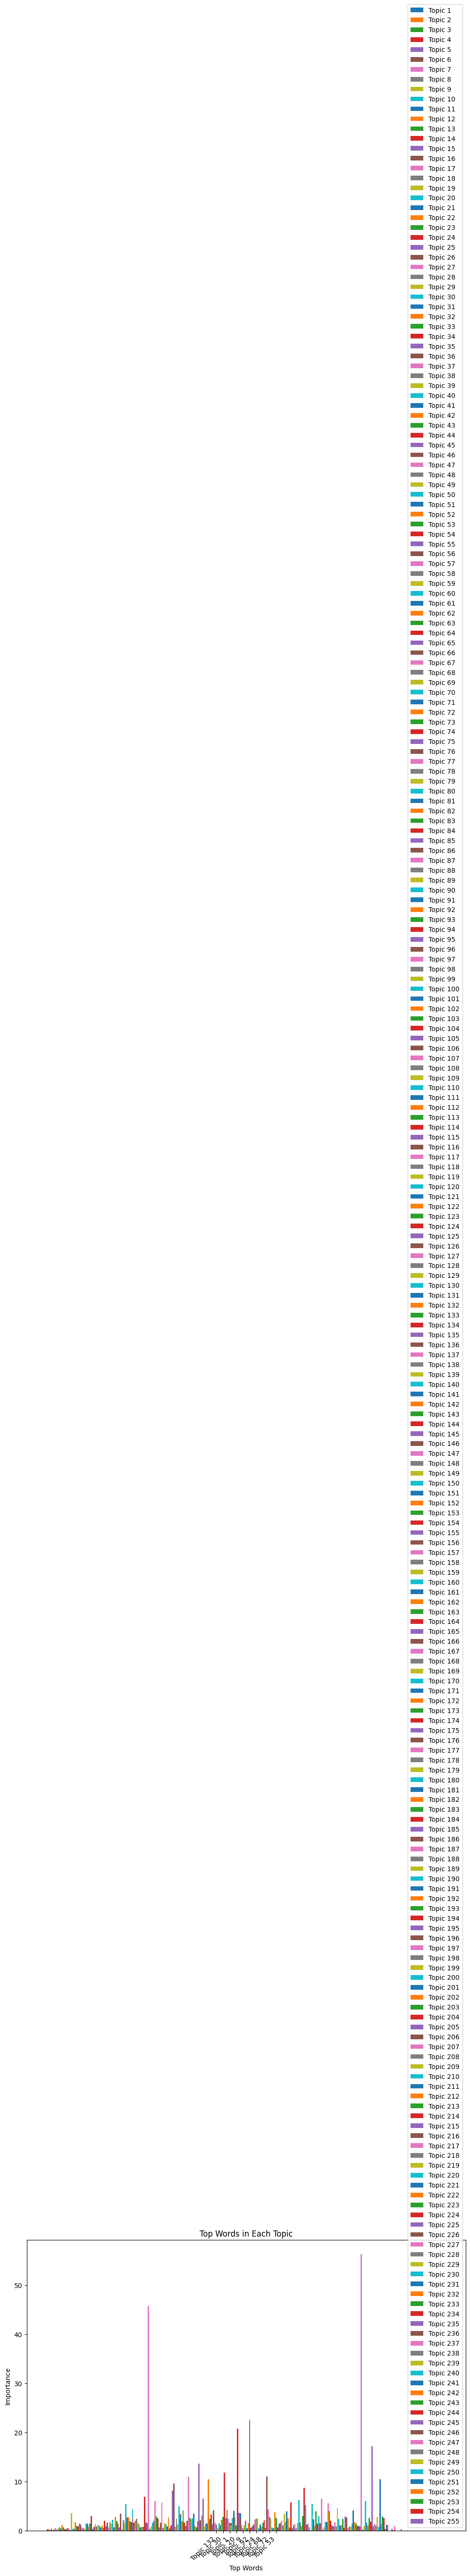

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize top terms for all topics in a single graph
num_top_words = 10
selected_topics = range(num_topics)  # Visualize all topics

# Create a vertical grouped bar chart for all topics
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
bar_positions = np.arange(num_top_words)

for topic_idx in selected_topics:
    top_words_idx = H[topic_idx].argsort()[:-num_top_words - 1:-1]
    top_words = [labels[i] for i in top_words_idx]

    ax.bar(bar_positions + bar_width * topic_idx, H[topic_idx][top_words_idx], bar_width, label=f'Topic {topic_idx + 1}')

ax.set_xlabel('Top Words')
ax.set_ylabel('Importance')
ax.set_title('Top Words in Each Topic')
ax.set_xticks(bar_positions + bar_width * (len(selected_topics) - 1) / 2)
ax.set_xticklabels(top_words, rotation=45, ha='right')

# Add topic names to the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'Topic {topic_idx + 1}' for topic_idx in selected_topics])

plt.show()


In [ ]:
#BELOW IS ANOTHER TEXT CHOSEN RANDOMLY FROM SAMPLE ESSAY BY A STUDENT IN GOOGLE SEARCH

In [2]:
from google.colab import files

uploaded_model1 = files.upload()





Saving model3a.csv to model3a.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from sklearn.decomposition import NMF
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model

# Load the dataset
data = pd.read_csv('model3a.csv')

# Preprocess the data
# Convert labels to one-hot encoding
labels = data.iloc[:, 1:]
text_data = data['text']

# Train-test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Matrix Factorization (NMF)
num_topics = 255
nmf = NMF(n_components=num_topics)
W = nmf.fit_transform(labels)
H = nmf.components_

# Neural Collaborative Filtering (NCF)
num_users = labels.shape[0]
num_items = labels.shape[1]
embedding_dim = 64

# Define NCF model
user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

user_embedding = Embedding(num_users, embedding_dim)(user_input)
item_embedding = Embedding(num_items, embedding_dim)(item_input)

user_flat = Flatten()(user_embedding)
item_flat = Flatten()(item_embedding)

concat = Concatenate()([user_flat, item_flat])

dense_1 = Dense(64, activation='relu')(concat)
dense_2 = Dense(32, activation='relu')(dense_1)

output = Dense(1, activation='sigmoid')(dense_2)

ncf_model = Model(inputs=[user_input, item_input], outputs=output)
ncf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train NCF model
user_indices = train_data.index
item_indices = range(num_items)
labels_train = labels.values

# Define positive and negative samples for training
def generate_samples():
    for user in user_indices:
        for item in item_indices:
            yield user, item, labels_train[user, item]

samples = np.array(list(generate_samples())).T
users_train = samples[0]
items_train = samples[1]
labels_train = samples[2]

ncf_model.fit([users_train, items_train], labels_train, epochs=10, batch_size=8)

# Recommendation for a given text
def recommend_labels(text, threshold=0.5):
    # Predict labels using NCF model
    user_idx = np.array([0] * num_items)  # Assuming user index 0 for recommendation
    item_idx = np.array(range(num_items))
    scores = ncf_model.predict([user_idx, item_idx])

    # Apply thresholding to get binary predictions
    binary_predictions = (scores > threshold).astype(int)

    # Get the indices of recommended labels based on thresholding
    recommended_labels = np.where(binary_predictions == 1)[0]

    return recommended_labels

# Example: Recommend labels for a given text
text_user_input = "One of the proudest accomplishments of my life was earning my college degree, despite the fact that my early adulthood pointed in the opposite direction, beginning with my marriage at the age of 19. Throughout the 1990s I lived as one of the working poor,someone who slipped through the cracks of supposedly historic prosperity"


recommended_labels = recommend_labels(text_user_input)

# Print recommended labels
print("Recommended Microcredentials for the input text:")
for label in recommended_labels:
    print(f"Label {label}: {labels.columns[label]}")


Epoch 1/10
52744/52744 [==============================] - 149s 3ms/step - loss: 0.1175 - accuracy: 0.9650
Epoch 2/10
52744/52744 [==============================] - 150s 3ms/step - loss: 0.1094 - accuracy: 0.9671
Epoch 3/10
52744/52744 [==============================] - 150s 3ms/step - loss: 0.1043 - accuracy: 0.9679
Epoch 4/10
52744/52744 [==============================] - 148s 3ms/step - loss: 0.1008 - accuracy: 0.9687
Epoch 5/10
52744/52744 [==============================] - 149s 3ms/step - loss: 0.0970 - accuracy: 0.9693
Epoch 6/10
52744/52744 [==============================] - 148s 3ms/step - loss: 0.0937 - accuracy: 0.9710
Epoch 7/10
52744/52744 [==============================] - 146s 3ms/step - loss: 0.0915 - accuracy: 0.9720
Epoch 8/10
52744/52744 [==============================] - 151s 3ms/step - loss: 0.0900 - accuracy: 0.9723
Epoch 9/10
52744/52744 [==============================] - 151s 3ms/step - loss: 0.0886 - accuracy: 0.9727
Epoch 10/10
5/5 [=============================